In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    num1 : int
    operation : str
    num2 : int
    result : int

In [11]:
def adder(state:AgentState) -> AgentState:
    """Adds numbers"""
    state["result"] = state["num1"] + state["num2"]
    return state   

def subtractor(state:AgentState) -> AgentState:
    """Subtracts numbers"""
    state["result"] = state["num1"] - state["num2"]
    return state 

def decide_next_node(state:AgentState) -> AgentState:
    """Decides which node to run next"""
    if state["operation"] == "+":
        return "addition"
    else:
        return "subtraction"   

In [12]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder)

graph.add_node("subtract_node",subtractor)

graph.add_node("router_node",lambda state:state) #passthrough function

graph.add_edge(START,"router_node")

graph.add_conditional_edges(
    "router_node",
    decide_next_node,
    {
        # Edge : Node
        "addition": "add_node",
        "subtraction": "subtract_node",
    }
)

graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)


app = graph.compile()

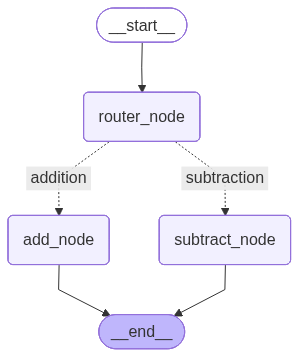

In [13]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
result = app.invoke({"num1":1, "num2":5, "operation" : "-"})

In [20]:
result["result"]

-4